# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**  

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Открытие файла с данными и изучение общей информации

Для начала, импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные в переменную `data`. Ознакомимся с первыми 10 строками, с помощью метода `head()`

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Text(0.5, 0.92, 'Гистограммы для признаков')

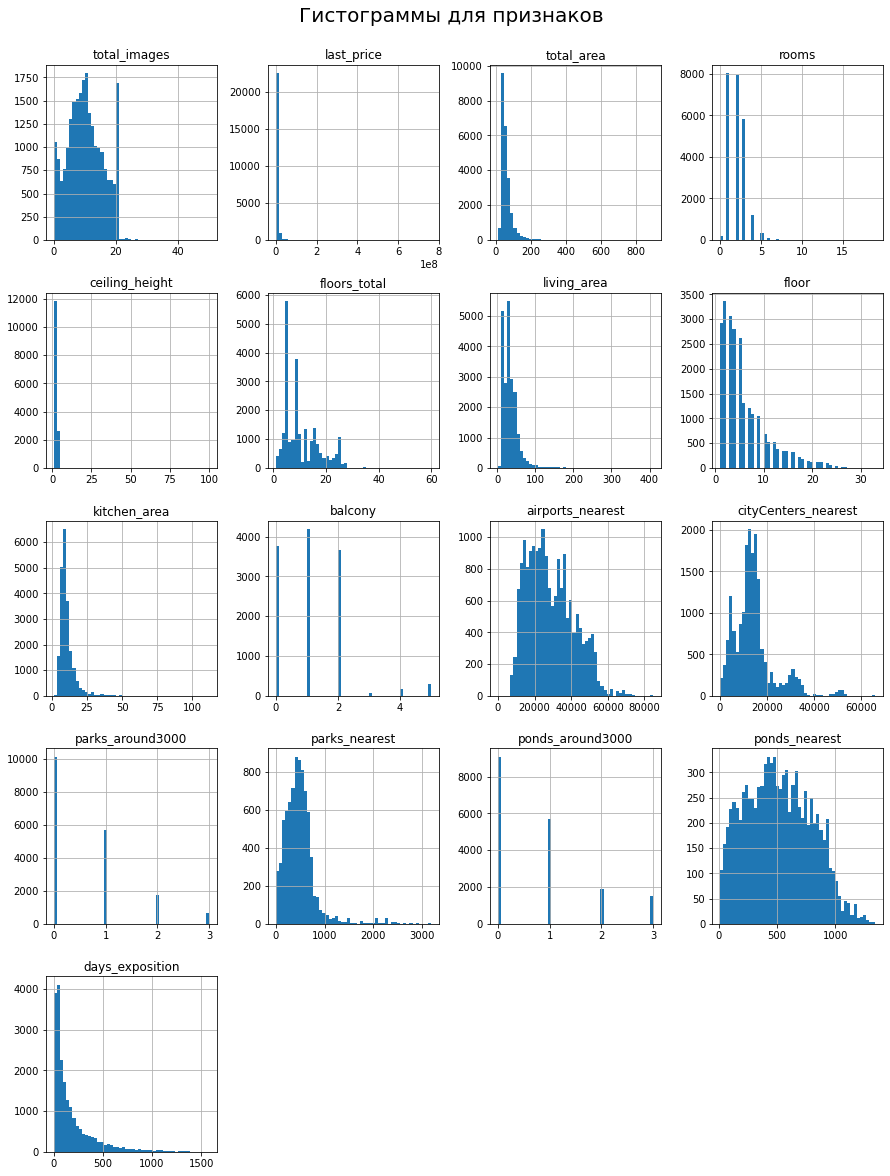

In [4]:
axes = data.hist(figsize=(15, 20), bins=50)
plt.suptitle("Гистограммы для признаков", size=20, y=0.92)

Просмотрев основную информацию о данных можно сделать несколько выводов:
* Во многих столбцах есть пропущенные значения. Постараемся обработать их.
* Многие столбцы также содержат некорректные типы данных. Изменим их на более подходящие.
* По гистограммам видно, что в нескольких столбцах присутствуют выбросы, например в `'last_price'`, `'living_area'`, `'ceiling_height'` и `'total_area'`. Эти значения также обработаем.

### Предобработка данных

Приведём столбец `'cityCenters_nearest'` к lower_snake_case

In [5]:
data = data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})

Посчитаем количество пропусков в данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заполнение пропусков

##### Столбец `'is_apartment'`

Заполняем пропуски в столбце `'is_apartment'`. Можно заполнить пропуски значением False, так как если продавец не указал, что квартира является апартаментами, скорее всего она и не является ими.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Убедимся, что пропусков больше нет

In [8]:
data['is_apartment'].isna().sum()

0

##### Столбец `'balcony'`

В столбцах `'balcony'` можно заполнить пропуски нулём. Если продавец не указал количество балконов в квартире, скорее всего их нет.

In [9]:
data['balcony'] = data['balcony'].fillna(value=0)

Убедимся, что пропусков больше нет

In [10]:
data['balcony'].isna().sum()

0

##### Столбец `'locality_name'`

Пропущенные значения в столбце `'locality_name'` можно заполнить значением 'Населённый пункт не указан'.

In [11]:
data['locality_name'] = data['locality_name'].fillna(value='Населённый пункт не указан')

Убедимся, что пропусков больше нет

In [12]:
data['locality_name'].isna().sum()

0

##### Столбцы `'parks_around3000'` и `'ponds_around3000'`

Проверим столбцы `'parks_nearest'`, `'parks_around3000'`, `'ponds_nearest'`, `'ponds_around3000'`. 

In [13]:
# выведем уникальные значения столбца 'parks_around3000' в тех строках, 
# где в столбце 'parks_nearest' данные пропущены
print(data.loc[data['parks_nearest'].isna()]['parks_around3000'].unique())
# количество пропущенных значений в столбце 'parks_around3000' в тех строках, 
# где в столбце 'parks_nearest' данные пропущены
print(data.loc[data['parks_nearest'].isna()]['parks_around3000'].isna().sum())

[ 0. nan]
5518


Сделаем такую же проверку столбцов `'ponds_nearest'`, `'ponds_around3000'`.

In [14]:
#уникальные значения в столбце 'ponds_around3000' в тех строках, 
#где в столбце 'ponds_nearest' данные пропущены
print(data.loc[data['ponds_nearest'].isna()]['ponds_around3000'].unique())
#количество пропущенных значений в столбце 'ponds_around3000' в тех строках, 
#где в столбце 'ponds_nearest' данные пропущены
print(data.loc[data['ponds_nearest'].isna()]['ponds_around3000'].isna().sum())

[ 0. nan]
5518


В строках с пропущенными значениями в столбцах `'parks_nearest'` и `'ponds_nearest'`, в столбцах `'parks_around3000'` и `'ponds_around3000'` есть только значения 0 и `nan`. 

При этом, в столбцах `'parks_around3000'` и `'ponds_around3000'` значения пропущены только там, где значения пропущены в столбцах `'parks_nearest'` и `'ponds_nearest'`. 

Таким образом, скорее всего, если в объявлении нет информации о расстоянии до парка и до водоёма, то в радиусе 3 км их нет. Поэтому, в столбцах `'parks_around3000'` и `'ponds_around3000'` можно заполнить пропущенные значения нулём.

In [15]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

In [16]:
print(data['parks_around3000'].isna().sum())
print(data['ponds_around3000'].isna().sum())

0
0


Пропуски в столбцах заполнены.

##### Столбцы `'airports_nearest'`, `'ponds_nearest'`, `'citycenters_nearest'` и `'parks_nearest'`

В столбцах с расстоянием в метрах до объектов не получится корректно заполнить пропуски. Мы не сможем узнать точно информацию по расстоянию до водоёма, парка, аэропорта и центра города для каждой из квартир. А медианные или средние значения только исказят данные, так как не будут точными.

##### Столбцы `'living_area'` и `'kitchen_area'`

Посчитаем среднее отношение площади кухни и жилой площади к общей площади квартиры, в строках без пропущенных данных.

In [17]:
coeff_kitchen = (data.loc[data['kitchen_area'].notna()]['kitchen_area'] 
                 / data.loc[data['kitchen_area'].notna()]['total_area']).mean()
coeff_kitchen

0.18735473877173864

In [18]:
coeff_living = (data.loc[data['living_area'].notna()]['living_area'] 
                 / data.loc[data['living_area'].notna()]['total_area']).mean()
coeff_living

0.5647655216993298

Посчитаем, сколько всего студий с пропусками в столбце `'kitchen_area'`: 

In [19]:
data.loc[(data['kitchen_area'].isna()) & data['studio'] == True]['last_price'].count()

149

Во всех этих строках можем заполнить пропуски нулём, так как в студиях нет отдельной кухни.

In [20]:
data.loc[(data['kitchen_area'].isna()) & data['studio'] == True, 'kitchen_area'] = data.loc[(data['kitchen_area'].isna()) & data['studio'] == True, 'kitchen_area'].fillna(0)
data.loc[(data['kitchen_area'].isna()) & data['studio'] == True].shape[0]

0

Пропуски заполнили. Теперь можно заполнить остальные пропуски в данных, умножив общую площадь на полученные коэффиценты.

In [21]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna()]['total_area'] * coeff_kitchen
data['kitchen_area'].isna().sum()

0

Повторим тоже самое для жилой площади:

In [22]:
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna()]['total_area'] * coeff_living
data['living_area'].isna().sum()

0

Округлим столбцы до десятых:

In [23]:
data['kitchen_area'] = data['kitchen_area'].round(1)
data['living_area'] = data['living_area'].round(1)

In [24]:
data.loc[: , ['total_area', 'kitchen_area', 'living_area']].head(10)

,total_area,kitchen_area,living_area
0,108.00,25.0,51.0
1,40.40,11.0,18.6
2,56.00,8.3,34.3
3,159.00,29.8,89.8
4,100.00,41.0,32.0
5,30.40,9.1,14.4
6,37.30,14.4,10.6
7,71.60,18.9,40.4
8,33.16,8.8,15.4
9,61.00,6.5,43.6


В строках 3 и 7 значения были пропущены. Можем увидеть, что они заполнились корректно.

##### Столбец `'days_exposition'`

В столбце `'days_exposition'` пропущенные значения возникли возможно из-за того, что квартира так и не была продана, либо продавец не снял объявление с сайта. Возможно, в дальнейшем, при анализе времени продажи придётся избавиться от этих строк, но пока мы оставим их, так как отсутствие информации это тоже важный знак.

##### Столбец `'ceiling_height'`

По гистограмме столбца `'ceiling_height'` видно, что большая часть значений высоты потолков лежит около нуля. Посчитаем сколько всего квартир имеют высоту потолков больше 5 метров:

In [25]:
print(len(data.loc[data['ceiling_height'] >= 5]))

37


Всего 37 объявлений. Объявления с высотой потолков 5 и более метров являются выбросами: их немного, да и маловероятно, что в квартире будут потолки выше 5 метров. Построим гистограмму для среза объявлений с высотой потолков менее 5 метров:

Text(0.5, 0, 'Высота (м)')

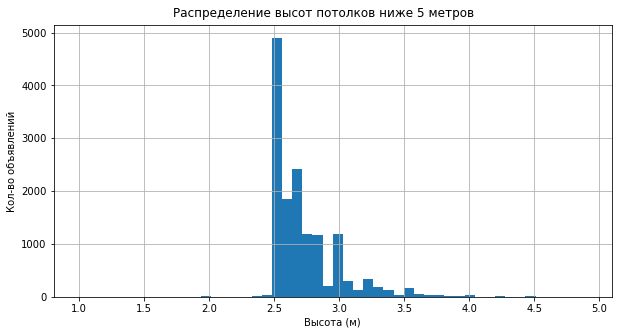

In [26]:
axes = data.loc[data['ceiling_height'] < 5]['ceiling_height'].hist(bins=50, figsize=(10, 5))
plt.suptitle("Распределение высот потолков ниже 5 метров", size=12, y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Высота (м)')

По гистограмме видно, что у большинства квартир высота потолков составляет от 2.5 до 3 метров. К тому же, если бы в квартире были необычно высокие потолки, продавец скорее всего указал бы эту информацию в объявлении. В объявлениях высота потолков скорее всего не указана продавцом, так как они в этой квартире обычные и продавец не посчитал нужным уточнять эту информацию. Поэтому, мы можем заполнить пропуски в столбце медианными значениями.

In [27]:
data['ceiling_height'].median()

2.65

In [28]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

Убедимся, что пропусков нет

In [29]:
data['ceiling_height'].isna().sum()

0

##### Столбец `'floors_total'`

В столбце `'floors_total'` пропусков немного, да и заполнять их медианными/средними значениями смысла нет. Количество этажей в доме не зависит ни от каких других параметров и сильно варьируется. Заполнение пропусков неточными значениями только исказит данные.

#### Изменение типов данных

Вызовем метод `'info()'` ещё раз, после заполнения пропусков:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

##### Столбец `'floors_total'`

Количество этажей в доме не может быть дробным числом, поэтому преобразуем столбец в целочисленный тип.

In [31]:
data['floors_total'] = data['floors_total'].astype('Int64')
data['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: Int64

##### Столбец `'balcony'`

Балконов также может быть только целое число:

In [32]:
data['balcony'] = data['balcony'].astype('Int64')
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: Int64

##### Столбец `'days_exposition'`

Количество дней с момента публикации до снятия объявления также можно сделать целочисленным. Нет смысла в дробной части для кол-ва дней, она не даёт нам какой-либо дополнительной информации.

In [33]:
data['days_exposition'] = data['days_exposition'].round().astype('Int64')
data['days_exposition']

0        <NA>
1          81
2         558
3         424
4         121
         ... 
23694    <NA>
23695      45
23696    <NA>
23697     602
23698    <NA>
Name: days_exposition, Length: 23699, dtype: Int64

##### Столбцы с количеством объектов в радиусе (`'parks_around3000'`, `'ponds_around3000'`)

Тут также можем изменить тип данных на `int`. Количество объектов может быть только целым числом.

In [34]:
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['parks_around3000']

0        1
1        0
2        1
3        2
4        2
        ..
23694    1
23695    0
23696    0
23697    2
23698    0
Name: parks_around3000, Length: 23699, dtype: Int64

In [35]:
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['ponds_around3000']

0        2
1        0
2        2
3        3
4        1
        ..
23694    3
23695    0
23696    0
23697    3
23698    0
Name: ponds_around3000, Length: 23699, dtype: Int64

##### Столбец с датой публикации (`'first_day_exposition'`)

В столбце с датой изменим тип данных с `'object'` на `'datetime'`.

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

В остальных столбцах нет несостыковок между типами данных и самими даннными. Можем оставить в них всё, как есть.

#### Устранение неявных дубликатов в названиях населённых пунктов

Просмотрим уникальные значения в столбце:

In [37]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Посмотрим сколько всего уникальных значений в столбце `'locality_name'`.

In [38]:
data['locality_name'].unique().size

365

В списке значений много раз повторяются одни и те же населённые пункты, но с отличием только в буквах "е" и "ё". Нужно заменить все буквы "ё" в значениях на буквы "е".

In [39]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [40]:
data['locality_name'].unique().size

331

Исправлением буквы "ё" мы избавились от 34 неявных дубликатов. Так как все населенные пункты в выборке находятся в окраинах Санкт-Петербурга, скорее всего, повторяющихся названий у разных населённых пунктов в данных нет. Например, "деревня Рабитцы" и "поселок Рабитцы", это скорее всего, один населённый пункт. Учитывая, что данные собирались в течение нескольких лет, населённые пункты могли изменить свой административный статус. Таким образом, мы можем избавиться от вида населённого пункта и оставить только его названия. К тому же, у многих населённых пунктов, административный статус не указан. 

In [41]:
def locality_change(row):     # Функция для удаления административного статуса н.п..
    for i in range(len(row)): # Цикл перебирает строку по символам и проверяет регистр символа.
        if row[i].isupper():  # Т.к., все названия н.п. начинаются с большой буквы, 
                              # мы можем обрезать всё, что находится до большой буквы.
            return row[i:]    # Функция возвращает только ту часть строки, 
                              # которая начинается с большой буквы, т.е. только название н.п.

In [42]:
# применим функцию к столбцу и присвоим ему значения, которые возвращает функция
data['locality_name'] = data['locality_name'].apply(locality_change) 
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [43]:
data['locality_name'].unique().size

306

Таким образом, мы убрали из данных вид населённого пункта, и избавились ещё от 25 неявных дубликатов.

#### Поиск и устранение аномальных значений

Посмотрим описание данных методом `'describe()'`:

In [44]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.562408,5.892358,10.539976,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.327103,4.885249,6.136554,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Очень нетипичные значения мы можем увидеть в столбцах `'last_price'`, `'total_area'`, `'rooms'`, `'ceiling_height'` и `'living_area'`. Также, нетипичным выглядит максимальное значение 1580 дней в столбце `'days_exposition'`, при медиане в 95 дней. Построим диаграммы размаха по этим столбцам и отсечём строки с аномально большими или маленькими значениями. Хотя, квартиры за 763 миллиона, с площадью 900 квадратных метров, и с 19 комнатами могут существовать, эти значения необходимо убрать. Это необходимо сделать, так как, в дальнейшем мы будем искать взаимосвязь между параметрами, и выбросы могут повлиять на результат. Искать взаимосвязи проще по более типичным данным.

##### Столбец `'ceiling_height'`

Построим диаграмму размаха для столбца `'ceiling_height'`:

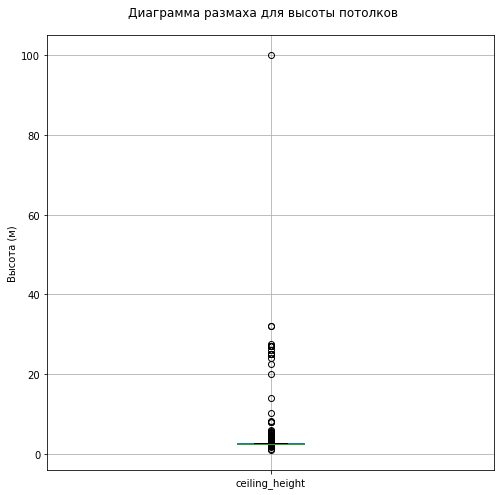

In [45]:
data.boxplot('ceiling_height', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для высоты потолков', y=0.93)
plt.ylabel('Высота (м)');

Ранее мы считали количество квартир с потолками 5 и более метров. Всего 37 объявлений. Возможно, среди этих квартир, есть несколько настоящих, но, скорее всего, это ошибочные данные. Можем удалить их. 

In [46]:
data = data.query('ceiling_height <= 5')

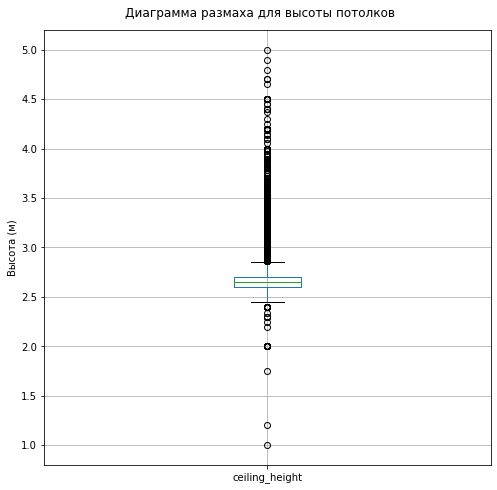

In [47]:
data.boxplot('ceiling_height', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для высоты потолков', y=0.92)
plt.ylabel('Высота (м)');

Теперь видно, что есть также несколько аномально низких значений. Квартиры с высотой потолков до 2 метров не выглядят реальными, от них тоже избавимся:

In [48]:
data = data.query('ceiling_height > 2')

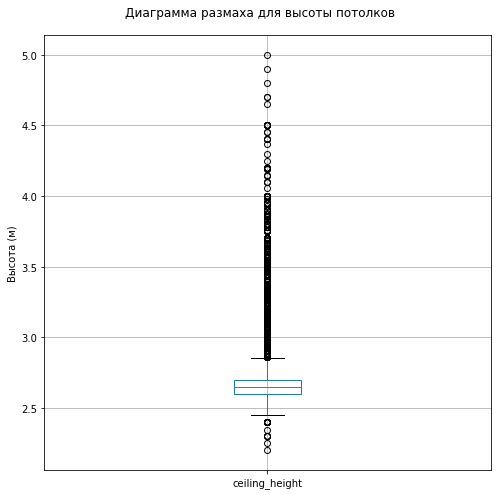

In [49]:
data.boxplot('ceiling_height', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для высоты потолков', y=0.93)
plt.ylabel('Высота (м)');

##### Столбец `'last_price'`

Построим диаграмму размаха для столбца `'last_price'`:

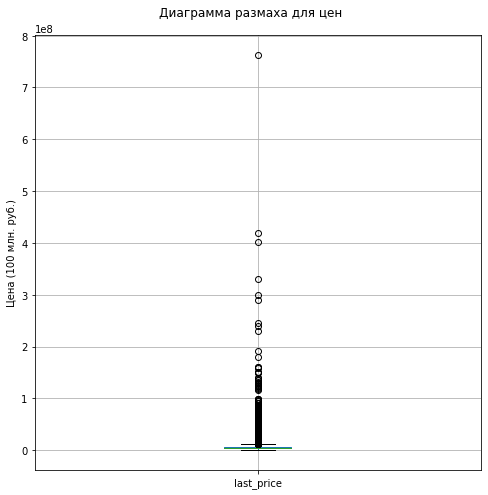

In [50]:
data.boxplot('last_price', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для цен', y=0.93)
plt.ylabel('Цена (100 млн. руб.)');

По диаграмме видно, что есть некоторое количество квартир, которые на порядок дороже основной массы. В данных, скорее всего, ошибок нет, такие дорогие квартиры имеют место быть. Но, так как мы будем искать закономерности между данными, лучше отбросить эти объявления. По более типичным данным будет проще провести анализ. Посмотрим, сколько всего квартир с ценой более 25 млн. рублей (это тоже дорогие квартиры, но не "невероятно дорогие").

In [51]:
data.query('last_price >= 25000000')['last_price'].count()

488

488 квартир, это не так много. Уберём эти данные, чтобы сделать выборку более типичной.

In [52]:
data = data.query('last_price < 25000000')

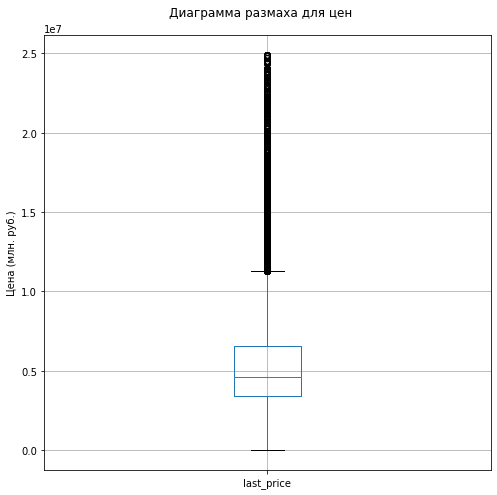

In [53]:
data.boxplot('last_price', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для цен', y=0.93)
plt.ylabel('Цена (10 млн. руб.)');

В описании данных методом `'describe()'` видно, что минимальное значение столбца нереалистично низкое. На диаграмме размаха его не видно, посмотрим на гистограмме:

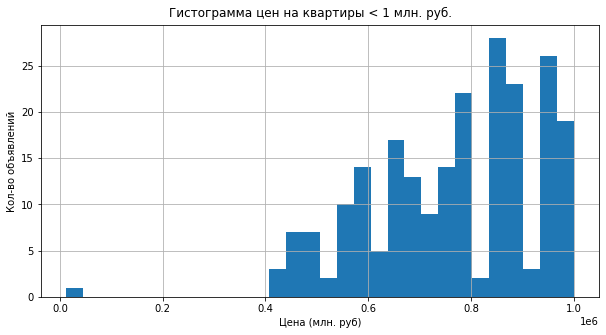

In [54]:
data.query('last_price < 1000000')['last_price'].hist(bins=30, figsize=(10, 5))
plt.suptitle('Гистограмма цен на квартиры < 1 млн. руб.', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Цена (млн. руб)');

На гистограмме видно одно объявление около нуля. Выведем эту строку:

In [55]:
data.query('last_price < 400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8


С этим объявлением явно не всё в порядке. Квартира с площадью 109 метров за 12190 рублей не внушает доверия. Удалим эти данные.

In [56]:
data = data.query('last_price >= 400000')

##### Столбец `'rooms'`

Построим гистограмму и диаграмму размаха для столбца `'rooms'`

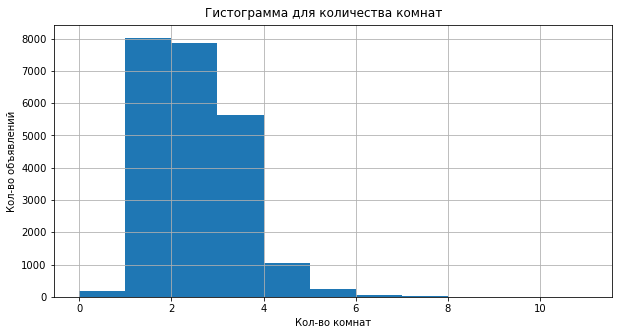

In [57]:
data['rooms'].hist(bins=11, figsize=(10, 5))
plt.suptitle('Гистограмма для количества комнат', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Кол-во комнат');

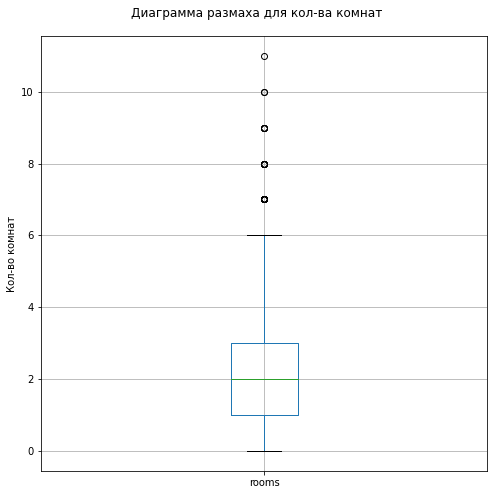

In [58]:
data.boxplot('rooms', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для кол-ва комнат', y=0.93)
plt.ylabel('Кол-во комнат');

In [59]:
data.query('rooms > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,13.3,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,<NA>
681,20,24900000.0,249.0,2015-08-13,7,2.65,5,180.0,4,False,...,46.7,1,Санкт-Петербург,24810.0,6108.0,0,NaN,0,NaN,781
813,7,16500000.0,229.0,2016-02-25,8,2.65,6,160.0,5,False,...,25.0,0,Санкт-Петербург,23968.0,4536.0,1,243.0,0,NaN,806
855,18,15000000.0,134.0,2017-10-27,7,2.65,4,88.0,3,False,...,12.0,0,Санкт-Петербург,22670.0,3936.0,1,803.0,1,387.0,150
1813,0,15000000.0,179.0,2017-04-09,7,2.65,5,126.4,5,False,...,20.9,0,Санкт-Петербург,20070.0,3186.0,1,104.0,1,803.0,15
1943,20,16000000.0,184.4,2018-10-21,7,2.65,6,125.7,5,False,...,23.1,0,Санкт-Петербург,23382.0,2923.0,1,525.0,1,791.0,109
2039,3,13520000.0,162.8,2018-03-21,7,3.00,4,121.6,4,False,...,15.9,0,Санкт-Петербург,20631.0,1899.0,3,360.0,3,153.0,<NA>
2261,15,17800000.0,164.0,2019-02-12,7,2.65,7,125.9,7,False,...,12.0,0,Санкт-Петербург,20139.0,2670.0,2,41.0,3,397.0,<NA>
2462,18,7900000.0,201.5,2018-08-17,7,2.65,2,113.8,2,False,...,37.8,0,Парголово,54990.0,20665.0,0,NaN,0,NaN,35
2673,11,16600000.0,214.0,2017-05-11,7,3.20,5,131.0,4,False,...,14.4,0,Санкт-Петербург,24542.0,4761.0,2,669.0,0,NaN,173


45 объявлений с квартирами от 7 до 11 комнат. Некоторые из них выглядят странно, учитывая количество комнат. Например, строка 23555, в ней 7-комнатная квартира имеет жилую площадь только 57.4 квадратных метров. Это практически точно не может быть правдой. От этих строк также избавимся, потому что, проверять каждую квартиру не вариант. К тому же, мы оставляем в выборке более типичные квартиры.

In [60]:
data = data.query('rooms <= 6')

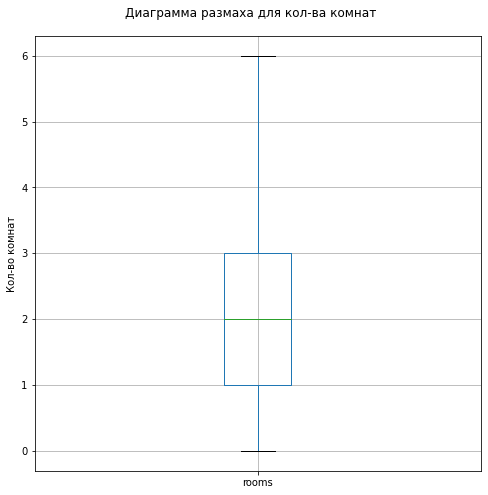

In [61]:
data.boxplot('rooms', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для кол-ва комнат', y=0.93)
plt.ylabel('Кол-во комнат');

В описании данных и на гистограмме видно, что также есть квартиры с нулём комнат. 

In [62]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.5,2,False,...,0.0,2,Мурино,NaN,NaN,0,NaN,0,NaN,181
349,4,2320000.0,25.00,2017-09-27,0,2.65,14,17.0,1,False,...,4.7,0,Кудрово,NaN,NaN,0,NaN,0,NaN,45
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.8,4,False,...,0.0,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64
508,0,3375000.0,34.40,2017-03-28,0,2.65,26,24.3,19,False,...,6.4,1,Парголово,53115.0,19292.0,0,NaN,1,593.0,430
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,14.1,7,False,...,0.0,0,Шушары,NaN,NaN,0,NaN,0,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25,18.0,16,False,...,0.0,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24,18.0,4,False,...,5.2,2,Мурино,NaN,NaN,0,NaN,0,NaN,4
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19,14.7,8,False,...,0.0,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9,18.0,8,False,...,5.4,2,Никольское,NaN,NaN,0,NaN,0,NaN,82


Возможно, таким образом, некоторые продавцы указывали количество комнат в квартирах студиях или в квартирах со свободной планировкой. Проверим это, посчитаем сколько студий и квартир со свободной планировкой в данном срезе:

In [63]:
data.query('rooms == 0')['studio'].sum()

137

In [64]:
data.query('rooms == 0')['open_plan'].sum()

57

В сумме как раз получается 194 объявления. Убедимся, что нет объявлений, в которых `'True'` или `'False'` в обоих параметрах:

In [65]:
data.query('rooms == 0').loc[((data['open_plan'] == True) & (data['studio'] == True)) 
         | ((data['open_plan'] == False) & (data['studio'] == False))].shape[0]

0

Всё в порядке. В срезе с "0-комнатными квартирами" каждая из них либо студия, либо квартира со свободной планировкой.

Посмотрим, как обозначено кол-во комнат в других объявлениях студий и свободных планировок:

In [66]:
data.query('studio == True and rooms != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2389,5,2250000.0,25.41,2016-06-07,1,2.65,12,17.1,8,False,...,0.0,2,Санкт-Петербург,14125.0,12921.0,2,328.0,2,485.0,26
3187,13,3800000.0,27.00,2016-05-17,1,2.65,14,18.0,8,False,...,0.0,2,Санкт-Петербург,50348.0,16053.0,0,NaN,0,NaN,45
4180,4,4500000.0,34.00,2016-04-25,1,2.80,10,21.0,10,False,...,0.0,2,Санкт-Петербург,23609.0,5299.0,0,NaN,1,433.0,62
8683,10,3500000.0,32.50,2016-05-05,1,3.00,23,29.9,11,False,...,0.0,2,Санкт-Петербург,34967.0,14640.0,0,NaN,1,564.0,45
11026,1,2800000.0,28.00,2016-05-04,1,2.65,26,19.0,6,False,...,0.0,2,Парголово,53511.0,19687.0,0,NaN,0,NaN,45
12935,10,2200000.0,31.00,2016-05-15,1,2.50,8,22.3,5,False,...,0.0,1,Никольское,NaN,NaN,0,NaN,0,NaN,44
15142,2,2700000.0,30.00,2016-05-10,1,2.65,21,26.0,6,False,...,0.0,0,Кудрово,NaN,NaN,0,NaN,0,NaN,55
18732,4,2400000.0,22.00,2016-05-06,1,2.65,10,15.0,6,False,...,0.0,0,Кудрово,NaN,NaN,0,NaN,0,NaN,45
20086,0,1550000.0,22.00,2016-05-11,1,2.70,15,10.9,14,False,...,0.0,2,Никольское,NaN,NaN,0,NaN,0,NaN,45
21702,9,2349000.0,23.40,2016-05-19,1,2.70,20,16.0,8,False,...,0.0,1,Новое Девяткино,NaN,NaN,0,NaN,0,NaN,34


In [67]:
data.query('open_plan == True and rooms != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1379,3,6000000.0,44.2,2015-11-10,1,2.65,25,17.4,23,False,...,8.3,1,Санкт-Петербург,10663.0,12738.0,0,NaN,0,NaN,231
5668,9,3550000.0,36.7,2016-04-25,1,2.75,16,17.8,2,False,...,6.9,2,Кудрово,NaN,NaN,0,NaN,0,NaN,61
8861,13,5500000.0,64.5,2015-11-13,3,3.00,5,48.0,2,False,...,12.1,0,Санкт-Петербург,20040.0,2621.0,2,205.0,2,204.0,229
9063,6,3800000.0,39.0,2016-05-19,1,2.65,17,30.0,1,False,...,7.3,0,Санкт-Петербург,36721.0,13635.0,0,NaN,0,NaN,45
12760,0,3350000.0,51.0,2015-01-22,2,2.50,12,30.0,10,False,...,9.6,2,Коммунар,NaN,NaN,0,NaN,0,NaN,521
14017,13,3990000.0,59.0,2016-03-29,3,2.50,9,37.6,3,False,...,11.1,1,Колпино,27820.0,33606.0,0,NaN,1,705.0,81
19796,1,12000000.0,97.2,2016-04-05,4,3.35,5,71.3,2,False,...,18.2,0,Санкт-Петербург,24559.0,4811.0,0,NaN,0,NaN,89


В остальных студиях указана 1 комната, значит можем спокойно заменить 0 на 1 в квартирах-студиях. Однокомнатная квартира звучит логичнее, чем "нолькомнатная". Сейчас нужно посмотреть площадь квартир со свободной планировкой и нулём комнат.

In [68]:
print('Максимальный метраж в квартирах с 0 комнат:', data.query('open_plan == True and rooms == 0')['total_area'].max())
print('Минимальный метраж в квартирах с 0 комнат:', data.query('open_plan == True and rooms == 0')['total_area'].min())

Максимальный метраж в квартирах с 0 комнат: 42.63
Минимальный метраж в квартирах с 0 комнат: 16.0


У всех этих квартир небольшой метраж, который подходит однокомнатным квартирам. Тут также можем заменить 0 на 1.

In [69]:
data['rooms'] = data['rooms'].replace(0, 1)

Убедимся, что "нолькомнатных" квартир больше нет:

In [70]:
data.query('rooms == 0').shape[0]

0

##### Столбец `'total_area'`

Посмотрим, как изменились данные для этого столбца, после удаления строк в предыдущих пунктах:

In [71]:
data['total_area'].describe()

count    23115.000000
mean        57.233403
std         25.494366
min         12.000000
25%         40.000000
50%         51.000000
75%         67.900000
max        460.800000
Name: total_area, dtype: float64

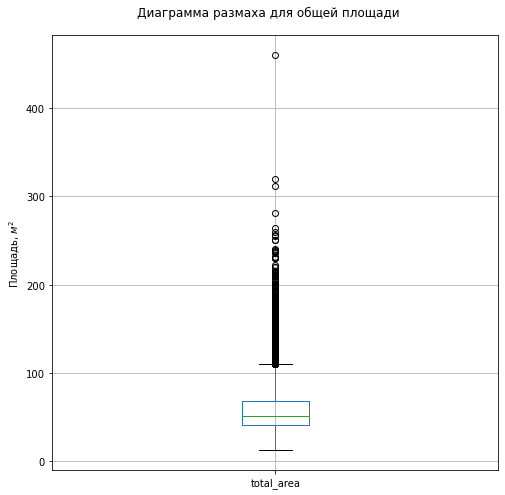

In [72]:
data.boxplot('total_area', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для общей площади', y=0.93)
plt.ylabel('Площадь, $м^2$');

Хотя на диаграмме квартиры с площадью более 100 метров отображаются, как выбросы, такая площадь для квартир нормальная. Посмотрим сколько есть квартир с площадью более 200 метров:

In [73]:
data.query('total_area > 200').shape[0]

39

39 строк, немного, их также убираем.

In [74]:
data = data.query('total_area <= 200')

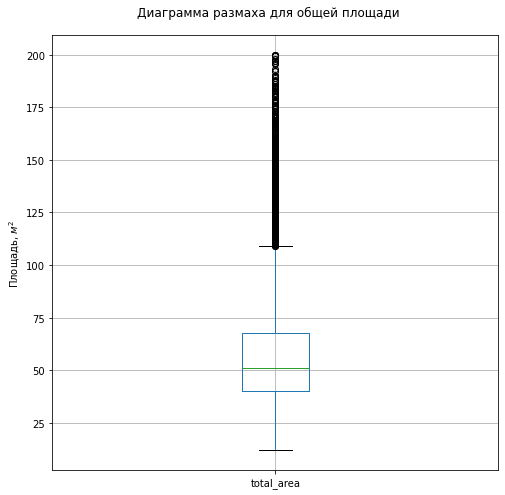

In [75]:
data.boxplot('total_area', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для общей площади', y=0.93)
plt.ylabel('Площадь, $м^2$');

##### Столбцы `'living_area'`.

Повторим те же действия, как и с прошлым столбцом.

In [76]:
data['living_area'].describe()

count    23076.000000
mean        32.593799
std         16.183380
min          2.000000
25%         18.800000
50%         30.000000
75%         41.200000
max        164.700000
Name: living_area, dtype: float64

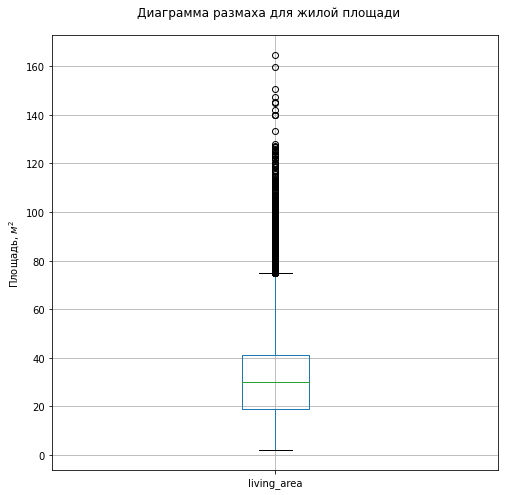

In [77]:
data.boxplot('living_area', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для жилой площади', y=0.93)
plt.ylabel('Площадь, $м^2$');

Большая часть аномально больших значений в этом столбце ушла вместе с выбросами столбца `'total_area'`. Учитывая то, какие значения мы оставили в столбце с общей площадью, тут данные выглядят нормально, без аномалий. Никакие значения убирать не будем.

На всякий случай проверим, нет ли несостыковок в строках. Проверим, чтобы не было такой ситуации, что в каком-то объявлении жилая площадь или площадь кухни больше, чем общая площадь.

In [78]:
data.query('total_area < living_area or total_area < kitchen_area').shape[0]

0

Всё в порядке, несостыковок нет.

##### Столбец `'days_exposition'`

In [79]:
data['days_exposition'].describe()

count    20058.000000
mean       178.391564
std        216.877189
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

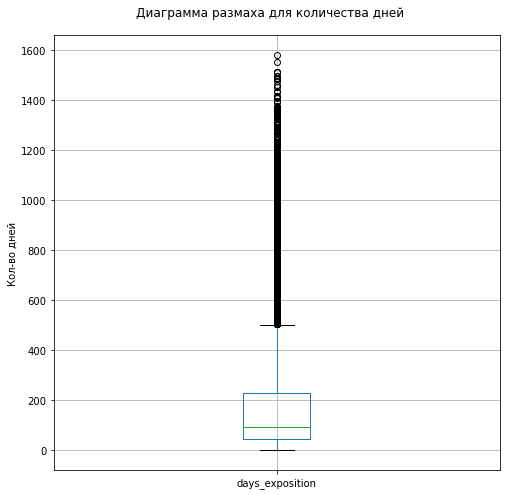

In [80]:
data.boxplot('days_exposition', figsize=(8, 8))
plt.suptitle('Диаграмма размаха для количества дней', y=0.93)
plt.ylabel('Кол-во дней');

Довольно много значений на диаграмме отображаются, как выбросы. Посчитаем их количество:

In [81]:
data.loc[data['days_exposition'] > 500].shape[0]

1659

Целых 1659 значений. В следующих заданиях, которые уже непосредственно связаны с анализом, посмотрим, насколько равномерно распределяются значения в этом столбце. Если распределение будет равномерным, то эти данные удалять смысла нет. В любом случае, наша задача определить, какой срок продажи является слишком долгим и что на него влияет больше всего. Поэтому пока эти аномальные значения лучше всё-таки оставить.

Из-за того, что некоторые значения были удалены, в фрейме сбились индексы. Сбросим индексы, а также проверим сколько данных мы удалили.

In [82]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23076 entries, 0 to 23075
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23076 non-null  int64         
 1   last_price            23076 non-null  float64       
 2   total_area            23076 non-null  float64       
 3   first_day_exposition  23076 non-null  datetime64[ns]
 4   rooms                 23076 non-null  int64         
 5   ceiling_height        23076 non-null  float64       
 6   floors_total          22991 non-null  Int64         
 7   living_area           23076 non-null  float64       
 8   floor                 23076 non-null  int64         
 9   is_apartment          23076 non-null  bool          
 10  studio                23076 non-null  bool          
 11  open_plan             23076 non-null  bool          
 12  kitchen_area          23076 non-null  float64       
 13  balcony         

В сумме мы избавились от 623 строк. Это немного, а данные стали значительно лучше, и мы избавились от явных выбросов.

### Создание признаков

#### Столбец `'metre_price'` 

Добавим в таблицу столбец `'metre_price'` с ценой одного квадратного метра:

In [83]:
data['metre_price'] = (data['last_price'] / data['total_area']).astype('int64')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23076 entries, 0 to 23075
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23076 non-null  int64         
 1   last_price            23076 non-null  float64       
 2   total_area            23076 non-null  float64       
 3   first_day_exposition  23076 non-null  datetime64[ns]
 4   rooms                 23076 non-null  int64         
 5   ceiling_height        23076 non-null  float64       
 6   floors_total          22991 non-null  Int64         
 7   living_area           23076 non-null  float64       
 8   floor                 23076 non-null  int64         
 9   is_apartment          23076 non-null  bool          
 10  studio                23076 non-null  bool          
 11  open_plan             23076 non-null  bool          
 12  kitchen_area          23076 non-null  float64       
 13  balcony         

#### Столбец `'weekday'` 

Сделаем столбец `'weekday'` с названием дня недели:

In [85]:
data['weekday'] = data['first_day_exposition'].dt.day_name()

In [86]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370,Thursday
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920,Tuesday
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,Thursday
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,Tuesday
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065,Monday


#### Столбец `'month'` 

In [87]:
data['month'] = data['first_day_exposition'].dt.month_name()

In [88]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370,Thursday,March
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81,82920,Tuesday,December
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558,92785,Thursday,August
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121,100000,Tuesday,June
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,0,NaN,0,NaN,55,95065,Monday,September


#### Столбец `'year'`

Добавим столбец `'year'` с годом публикации объявления:

In [89]:
data['year'] = data['first_day_exposition'].dt.year

In [90]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,<NA>,120370,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81,82920,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785,Thursday,August,2015
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000,Tuesday,June,2018
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,0,NaN,55,95065,Monday,September,2018


#### Столбец `'floor_type'` 

Категоризируем данные. Квартирам на первых и последних этажах присвоим категории "первый" и "последний". Остальным присвоим категорию "другие". В некоторых объявлениях нет информации о том, сколько этажей всего в доме, поэтому присвоим им категорию "не первый".

In [91]:
def floor_category(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        if row['floor'] == 1:
            return 'первый'
        else:
            return 'не первый'

In [92]:
data['floor_type'] = data.apply(floor_category, axis=1)

In [93]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,<NA>,120370,Thursday,March,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0,NaN,81,82920,Tuesday,December,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558,92785,Thursday,August,2015,другой
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121,100000,Tuesday,June,2018,другой
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,NaN,0,NaN,55,95065,Monday,September,2018,другой


#### Столбец `'citycenter_km'`

Добавим столбец `'citycenter_km'` с расстоянием в километрах до центра города:

In [94]:
data['citycenter_km'] = (data['citycenters_nearest'] / 1000).round().astype('Int64')

In [95]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday,month,year,floor_type,citycenter_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,<NA>,120370,Thursday,March,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81,82920,Tuesday,December,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785,Thursday,August,2015,другой,14
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000,Tuesday,June,2018,другой,8
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55,95065,Monday,September,2018,другой,<NA>


### Исследовательский анализ данных

#### Изучение параметров и построение гистограмм к ним

##### Общая площадь

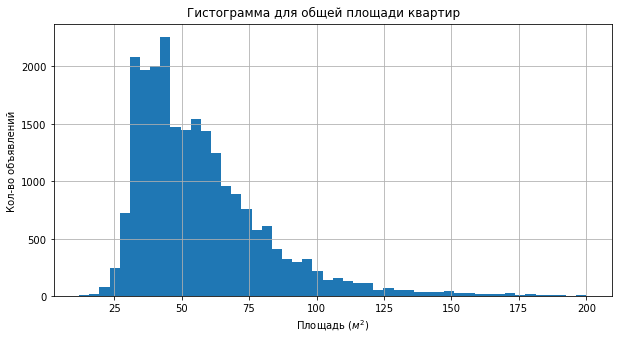

In [96]:
data['total_area'].hist(bins=50, figsize=(10, 5))
plt.suptitle('Гистограмма для общей площади квартир', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Площадь ($м^2$)');

На графике видно несколько небольших пиков: в районе 30, 40, 55-60 метров и 80-85 метров. Скорее всего, эти пики соответствуют наиболее типичному метражу для 1, 2, 3 и 4-х комнатных квартир. Каких-то необычных вещей не наблюдается, мы уже отфильтровали данные. 

##### Жилая площадь

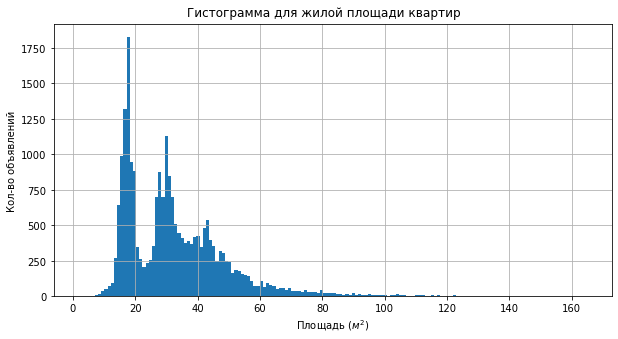

In [97]:
data['living_area'].hist(bins=160, figsize=(10, 5))
plt.suptitle('Гистограмма для жилой площади квартир', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Площадь ($м^2$)');

На этой гистограмме виден провал между 20 и 30 метрами. Этот разрыв, скорее всего, находится между 1 и 2-х комнатными квартирами. Это происходит потому, что 1 и 2-х комнатные квартиры чаще всего имеют стандартную площадь жилых комнат, но площадь кухни может розниться. Поэтому на гистограмме с общей площадью такого разрыва нет.

##### Площадь кухни

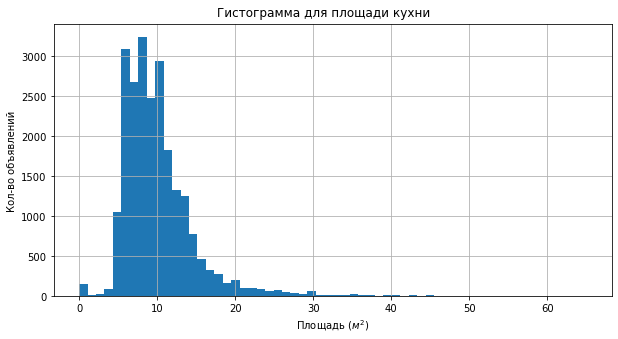

In [98]:
data['kitchen_area'].hist(bins=60, figsize=(10, 5))
plt.suptitle('Гистограмма для площади кухни', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Площадь ($м^2$)');

Большая часть кухонь имеет площадь от 5 до 15 квадратных метров. При этом, площадь кухонь не имеет такого разрыва, как жилая площадь, следовательно, она бывает более разнообразной, чем площадь жилых комнат.

##### Цена объекта

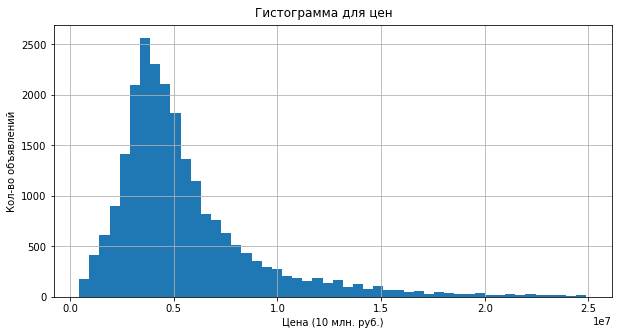

In [99]:
data['last_price'].hist(bins=50, figsize=(10, 5))
plt.suptitle('Гистограмма для цен', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Цена (10 млн. руб.)');

Цена квартир распределяется абсолютно нормально, совпадает с распределением Пирсона. Основная масса квартир в Петербурге и его окраинах лежит в районе 3-4 млн. рублей.

##### Количество комнат

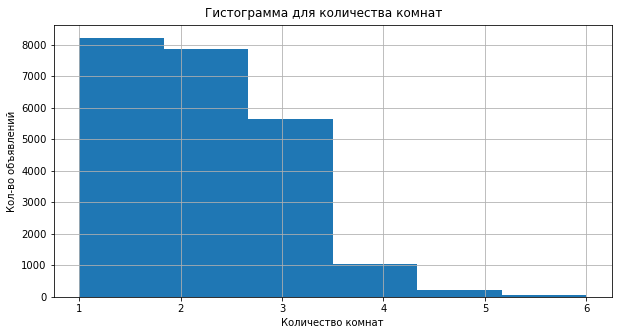

In [100]:
data['rooms'].hist(bins=6, figsize=(10, 5))
plt.suptitle('Гистограмма для количества комнат', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Количество комнат');

Однушек и двушек на рынке больше всего, это самые популярные варианты. Трёхкомнатных квартир тоже много, а потом идёт резкий спад. Квартир с 4 и более комнатами уже значительно меньше.

##### Высота потолков

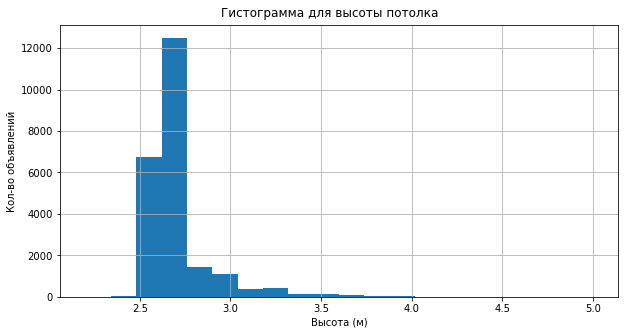

In [101]:
data['ceiling_height'].hist(bins=20, figsize=(10, 5))
plt.suptitle('Гистограмма для высоты потолка', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Высота (м)');

В большинстве квартир стандартная высота потолков: от 2.5 до 3 метров. Более высокие потолки - это редкость.

##### Этаж квартиры

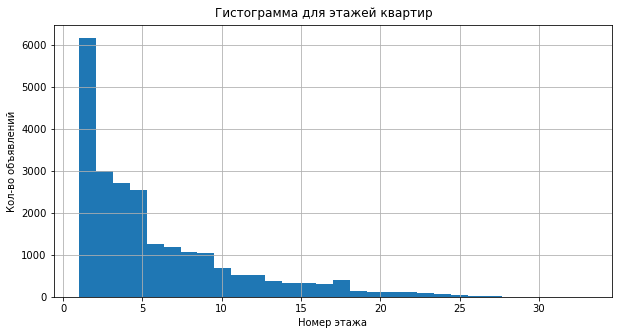

In [102]:
data['floor'].hist(bins=30, figsize=(10, 5))
plt.suptitle('Гистограмма для этажей квартир', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Номер этажа');

Чаще всего продаются квартиры на первом этаже, это связано с тем, что первый этаж есть в абсолютно любом доме. А остальные этажи уже не в каждом.

##### Тип этажа квартиры

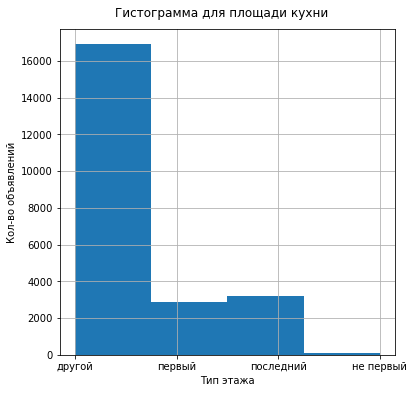

In [103]:
data['floor_type'].hist(bins=4, figsize=(6, 6))
plt.suptitle('Гистограмма для площади кухни', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Тип этажа');

Тут всё логично, квартир на первом и последнем этаже примерно одинаково, эти этажи есть в каждом доме. 

##### Общее количество этажей в доме

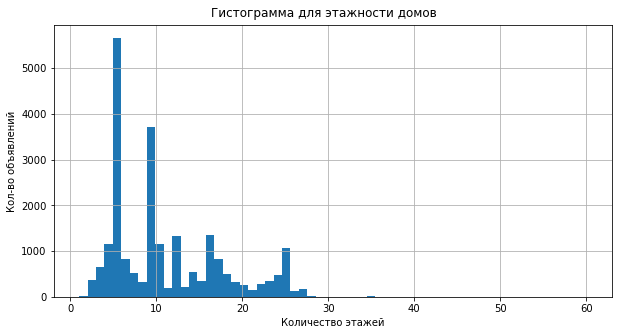

In [104]:
data['floors_total'].hist(bins=60, figsize=(10, 5))
plt.suptitle('Гистограмма для этажности домов', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Количество этажей');

По этой гистограмме можем сделать вывод, что больше всего квартир продаются в пятиэтажках, потом идут, девятиэтажки, 12-этажные, 16-этажные и 25-этажные дома. Также, можно сделать дополнительный вывод о том, что люди хотят переехать в более новые дома, поэтому больше всего объявлений по продаже квартир в старых пятиэтажных домах.

##### Расстояние до центра города в метрах

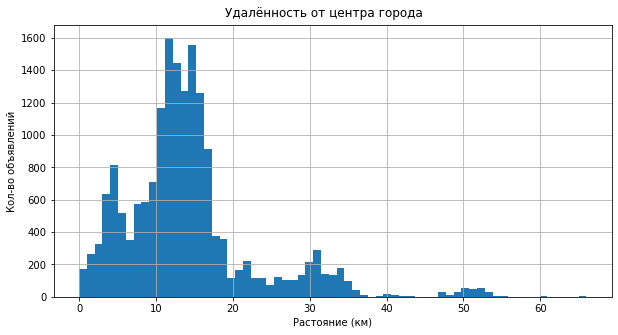

In [105]:
data['citycenter_km'].hist(bins=65, figsize=(10, 5))
plt.suptitle('Удалённость от центра города', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Растояние (км)');

Распределение, в целом, нормальное, но видно два пика в районе 30 и 50 км от центра. Скорее всего, на этом расстоянии от центра Петербурга находятся какие-то крупные населённые пункты.

##### Расстояние до ближайшего аэропорта

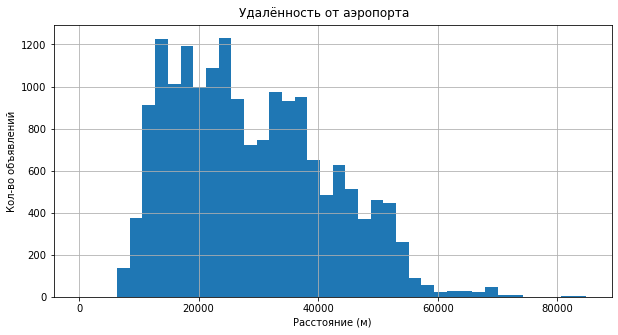

In [106]:
data['airports_nearest'].hist(bins=40, figsize=(10, 5))
plt.suptitle('Удалённость от аэропорта', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Расстояние (м)');

##### Расстояние до ближайшего парка

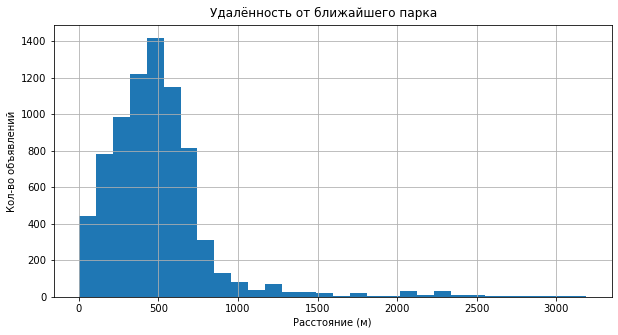

In [107]:
data['parks_nearest'].hist(bins=30, figsize=(10, 5))
plt.suptitle('Удалённость от ближайшего парка', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Расстояние (м)');

Тут мы видим нормальное распределение значений. У многих квартир парк находится в радиусе 500 метров. Но, по этой гистограмме нельзя сделать вывод, что у большинства квартир есть парк в радиусе 500 метров, так как в большинстве объявлений информация о расстоянии до парков не указана. Посмотрим гистограмму для столбца `'parks_around3000'`

In [108]:
data['parks_around3000'] = data['parks_around3000'].astype('Int64')

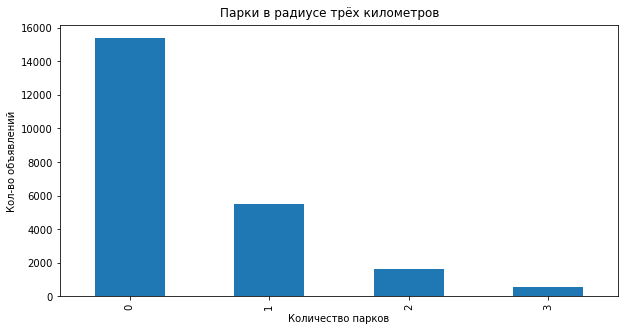

In [109]:
data['parks_around3000'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.suptitle('Парки в радиусе трёх километров', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Количество парков');

На этой диаграмме мы уже видим другую ситуацию. Более чем у половины квартир, в радиусе 3 километров, парков нет.

##### День и месяц публикации объявления

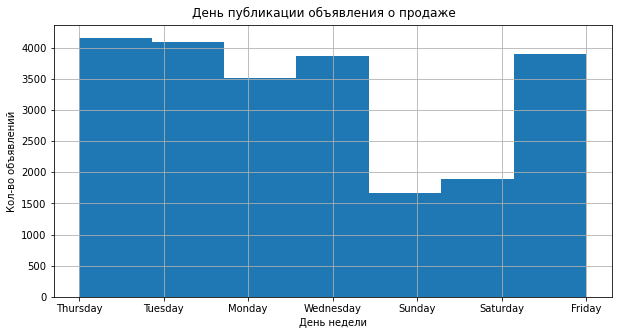

In [110]:
data['weekday'].hist(bins=7, figsize=(10, 5))
plt.suptitle('День публикации объявления о продаже', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('День недели');

По гистограмме видно, что меньше всего объявлений было выложено в выходные. Также, небольшую просадку видно в понедельник. Это логично, в выходные люди отдыхают и им не до публикаций, а понедельник просто тяжелый день. :)

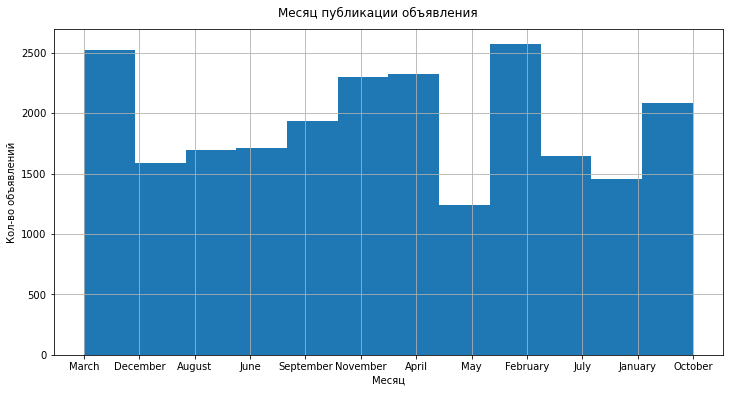

In [111]:
data['month'].hist(bins=12, figsize=(12, 6))
plt.suptitle('Месяц публикации объявления', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Месяц');

Меньше всего объявлений было выставлено в мае, январе и декабре, а больше всего в феврале, марте и октябре. Из этого, можно сделать вывод, что люди предпочитают продать квартиру до наступления лета и зимы. Также, наименьшее количество объявлений в январе, мае и декабре может быть связано с праздниками: Новый год и майские праздники.

#### Изучим, как быстро продавались квартиры (столбец `'days_exposition'`).

Построим гистограмму и посмотрим на описание данных по времени продажи квартир: 

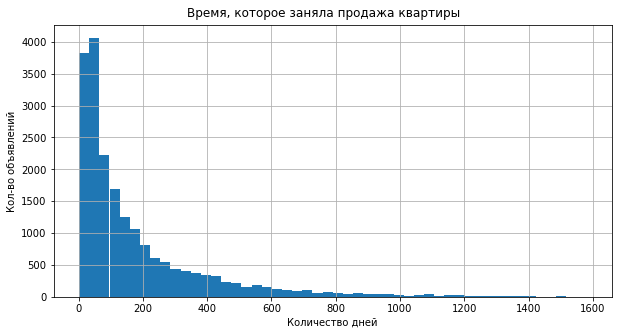

In [112]:
data['days_exposition'].hist(bins=50, figsize=(10, 5))
plt.suptitle('Время, которое заняла продажа квартиры', y=0.93)
plt.ylabel('Кол-во объявлений')
plt.xlabel('Количество дней');

Количество значений снижается очень равномерно, нет каких-либо нестандартных пиков. Смысла отрезать этот "тонкий хвост" нет, так как значения в этом хвосте можно просто отнести к необычно долгим. В этом ведь и заключается наша задача.

In [113]:
data['days_exposition'].describe()

count    20058.000000
mean       178.391564
std        216.877189
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Этого описания нам, в целом, достаточно для того, чтобы сказать, какие продажи являются долгими, а какие - нет. 

* В первом квартиле находятся быстрые продажи - до полутора месяцев.  
* Во втором квартиле нормальные продажи - до трёх месяцев.  
* В третьем квартиле находятся квартиры, время продажи которых уже затянулось - от 3 до 7-8 месяцев.
* Квартиры, которые продаются более 8 месяцев уже можно отнести к необычно долгим продажам.

#### Факторы, больше всего влияющие на общую (полную) стоимость объекта

Чтобы изучить зависимость стоимости от различных параметров можем построить столбчатую диаграмму по каждому из параметров с медианной стоимостью квартир по каждой категории. Также, проверим корелляцию, и посмотрим на диаграммы рассеяния.

##### Количество комнат

In [114]:
rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='median')

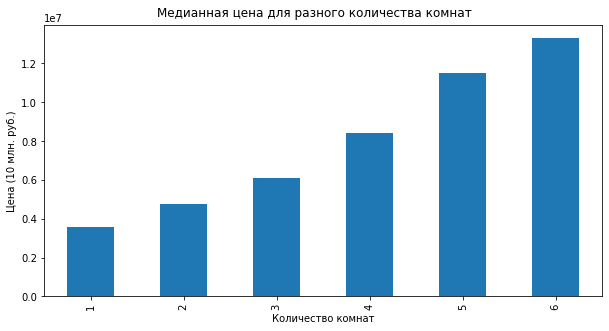

In [115]:
rooms_pivot.plot(kind='bar', figsize=(10, 5), legend=False)
plt.suptitle('Медианная цена для разного количества комнат', y=0.93)
plt.ylabel('Цена (10 млн. руб.)')
plt.xlabel('Количество комнат');

Количество квартир очевидно влияет на стоимость квартиры. Чем больше комнат - тем больше цена. Посмотрим, насколько сильно, узнаем корелляцию этих параметров.

In [116]:
data['rooms'].corr(data['last_price'])

0.4957649280653416

Зависимость определённо точно есть, но не она не является строго линейной. Да, с увеличением количества комнат, цена квартиры в среднем растёт, но так происходит не всегда. Абсолютно точно есть однокомнатные квартиры в центре Петербурга, которые будут дороже небольших трёхкомнатных квартир в каком-нибудь посёлке, вдали от города.

##### Общая площадь

В параметре с площадью не получится построить столбчатую диаграмму. Узнаем корелляцию и посмотрим на диаграмму рассеяния.

In [117]:
data['total_area'].corr(data['last_price'])

0.7812946608862511

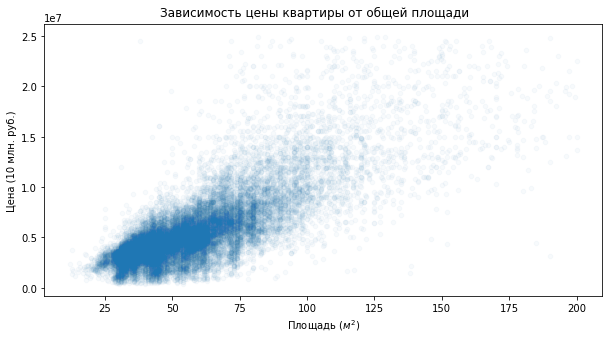

In [118]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, figsize=(10, 5))
plt.suptitle('Зависимость цены квартиры от общей площади', y=0.93)
plt.ylabel('Цена (10 млн. руб.)')
plt.xlabel('Площадь ($м^2$)');

С общей площадью квартиры уже лучше, этот параметр влияет на общую цену сильнее. Это видно и по корелляции равной 0.78, и по диаграмме рассеяния. Очевидно, что общая площадь квартиры, один из основных параметров влияющих на цену.

##### Площадь кухни

In [119]:
data['kitchen_area'].corr(data['last_price'])

0.6085033820080652

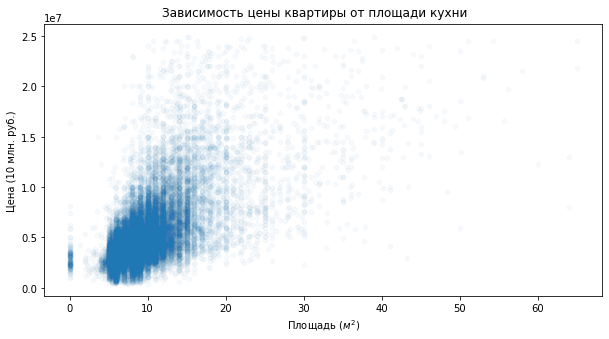

In [120]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03, figsize=(10, 5))
plt.suptitle('Зависимость цены квартиры от площади кухни', y=0.93)
plt.ylabel('Цена (10 млн. руб.)')
plt.xlabel('Площадь ($м^2$)');

Площадь кухни тоже влияет на цену, но не так сильно, как общая площадь квартиры. Людей не всегда интересует большая кухня, поэтому её нельзя назвать основным параметром ценообразования. 

##### Жилая площадь

In [121]:
data['living_area'].corr(data['last_price'])

0.6729099803056102

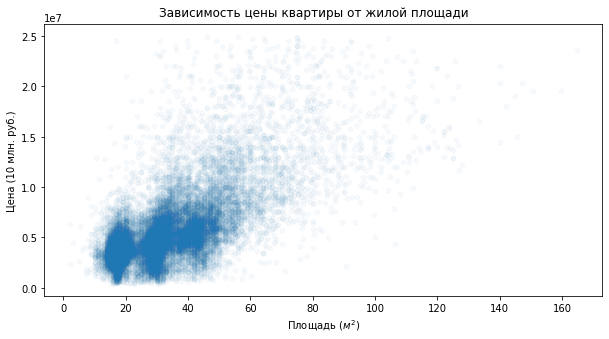

In [122]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03, figsize=(10, 5))
plt.suptitle('Зависимость цены квартиры от жилой площади', y=0.93)
plt.ylabel('Цена (10 млн. руб.)')
plt.xlabel('Площадь ($м^2$)');

Влияние жилой площади квартиры на цену больше, чем влияние площади кухни. Но всё равно недостаточно велико, как влияние общей площади. Всё-таки, люди чаще всего смотрят именно на общую площадь квартиры, и при продаже, и при покупке.

##### Этаж

Тут мы снова можем построить столбчатую диаграмму:

In [123]:
floors_pivot = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

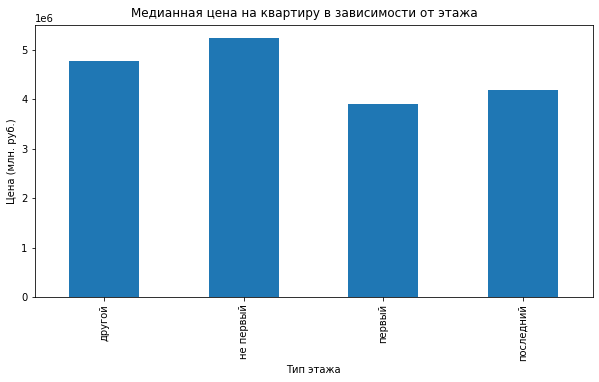

In [124]:
floors_pivot.plot(kind='bar', figsize=(10, 5), legend=False)
plt.suptitle('Медианная цена на квартиру в зависимости от этажа', y=0.93)
plt.ylabel('Цена (млн. руб.)')
plt.xlabel('Тип этажа');

По данной диаграмме видно, что в категориях "другой" и "не первый" медианная цена выше, чем в категориях "первый" и "последний". На первом этаже медианная цена ниже всего, данные квартиры менее привлекательны, чем квартиры на более высоких этажах. Последний этаж оказался также дешевле "других". Можем сделать вывод, что люди не предпочитают жить "с краю" :)   
Медианная разница почти в миллион рублей между первым и не первым этажом, это существенно. Следовательно, этаж также имеет значение при ценообразовании квартиры.

##### Дата размещения

График с медианной ценой для каждого года:

In [125]:
years_pivot = data.pivot_table(index='year', values='last_price', aggfunc='median')

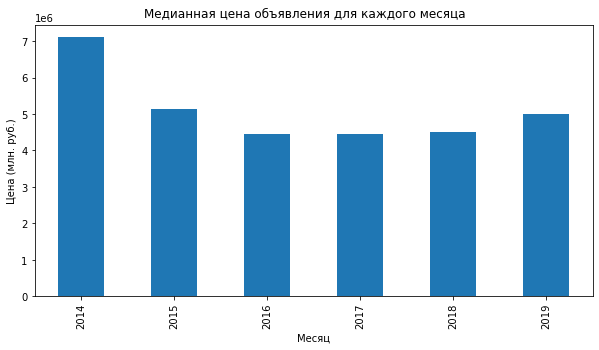

In [126]:
years_pivot.plot(kind='bar', figsize=(10, 5), legend=False)
plt.suptitle('Медианная цена объявления для каждого месяца', y=0.93)
plt.ylabel('Цена (млн. руб.)')
plt.xlabel('Месяц');

Месяца:

In [127]:
month_pivot = data.pivot_table(index='month', values='last_price', aggfunc='median')

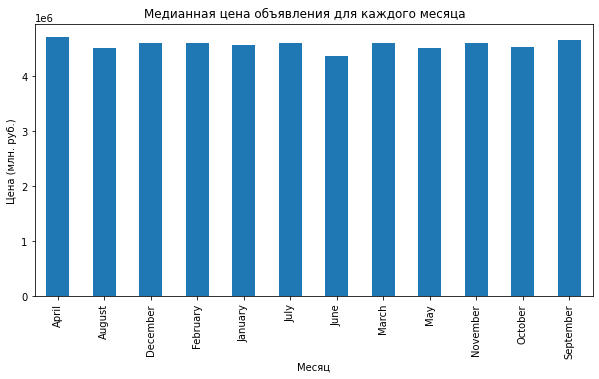

In [128]:
month_pivot.plot(kind='bar', figsize=(10, 5), legend=False)
plt.suptitle('Медианная цена объявления для каждого месяца', y=0.93)
plt.ylabel('Цена (млн. руб.)')
plt.xlabel('Месяц');

И дня недели:

In [129]:
weekday_pivot = data.pivot_table(index='weekday', values='last_price', aggfunc='median')

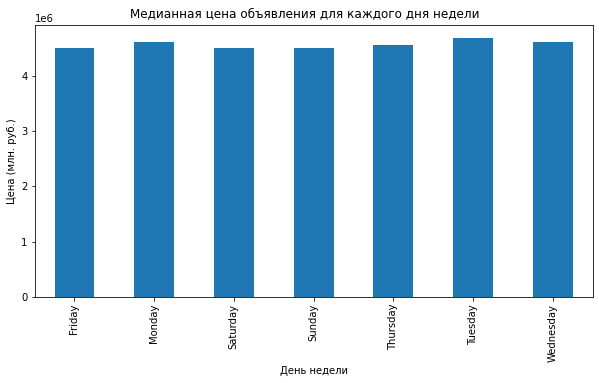

In [130]:
weekday_pivot.plot(kind='bar', figsize=(10, 5), legend=False)
plt.suptitle('Медианная цена объявления для каждого дня недели', y=0.93)
plt.ylabel('Цена (млн. руб.)')
plt.xlabel('День недели');

По этим диаграммам можно сделать следующие выводы:
* День недели практически не влияет на цену
* Месяц публикации также не оказывает большого влияния на цену. Можно отметить только небольшую просадку в июне, возможно, она связана с тем, что многие люди в этом месяце отдыхают. И, соответственно, спрос на квартиры снижается.  
* С годами закономерность есть. С 2014 по 2016 год наблюдался значительный спад в стоимости жилья. Потом, до 2018 года, цена почти не менялась. А в 2019 она снова начала расти.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [131]:
top_cities = list(data.groupby('locality_name')['last_price'] #список с 10 городами
              .count()                                        #с самым большим кол-вом объявлений
              .sort_values(ascending=False)
              .head(10)
              .index)

#создадим сводную таблицу со средней ценой одного населённого пункта в топ 10 н.п.
top_cities_metre_price = (data.query('locality_name in @top_cities')
                          .pivot_table(index='locality_name', values='metre_price', aggfunc='mean'))
top_cities_metre_price.sort_values(by='metre_price', ascending=False)

,metre_price
locality_name,
Санкт-Петербург,109651.826727
Пушкин,102230.595568
Кудрово,95325.726115
Парголово,90331.840491
Мурино,86064.363946
Шушары,78676.904545
Колпино,75332.866469
Гатчина,68757.225490
Всеволожск,68718.853904


В таблице можем ознакомиться со средней ценой одного квадратного метра в 10 населённых пунктах с самым большим количеством объявлений. Санкт-Петербург ожидаемо на первом месте, а замыкает десятку Выборг.

#### Вычислим среднюю цену каждого километра в Петербурге, и посмотрим, как стоимость объектов зависит от расстояния от центра города

Cделаем новый фрейм с объявлениями только из Петербурга:

In [132]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data.shape

(15138, 28)

Так как нам нужно проанализировать цену каждого километра, ранее мы уже привели столбец `'citycenter_km'` к целочисленному. Благодаря этому, можно будет сгрупировать объявления по расстоянию до центра. 

In [133]:
spb_data['citycenter_km'].unique()

<IntegerArray>
[  16,   14,    8,   12,   15,   11,   13,   10,    2,    4,   17,    7,    5,
 <NA>,    9,    3,    6,   21,   18,    1,   24,   26,   22,   20,   23,   25,
   27,   28,   19,    0,   29]
Length: 31, dtype: Int64

В данном столбце есть пропущенные значения. Так как мы анализируем именно расстояние до центра, объявления без этой информации нам не понадобятся. Можем удалить эти квартиры.

In [134]:
spb_data = spb_data.loc[spb_data['citycenter_km'].notna()]
spb_data['citycenter_km'].isna().sum()

0

Строки с пропущенными значениями удалены. Теперь можем сгрупировать данные по расстоянию до центра.

In [135]:
spb_pivot = spb_data.pivot_table(index='citycenter_km', values='metre_price', aggfunc='mean')
spb_pivot

,metre_price
citycenter_km,
0,118152.857143
1,132573.430380
2,127610.916667
3,114699.863354
4,123194.036683
5,128990.775990
6,128759.077369
7,127526.314286
8,122845.237347


Построим график по этим данным:

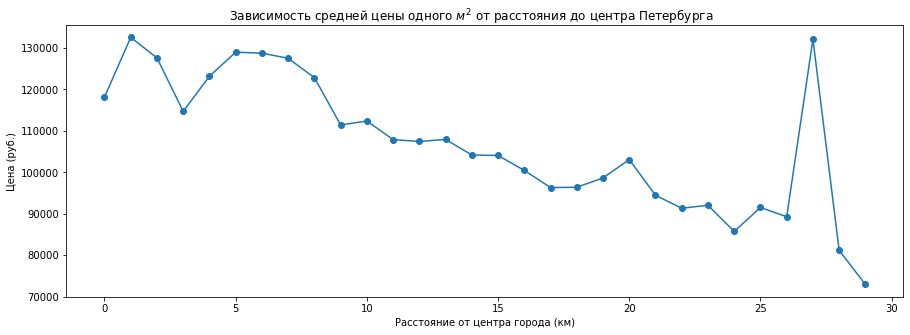

In [136]:
spb_pivot.plot(style='o-', figsize=(15, 5), legend=False)
plt.suptitle('Зависимость средней цены одного $м^2$ от расстояния до центра Петербурга', y=0.93)
plt.ylabel('Цена (руб.)')
plt.xlabel('Расстояние от центра города (км)');

На этом графике можно ознакомиться с динамикой изменения средней цены квадратного метра, в зависимости от расстояния до центра города. На графике можно отметить резкое снижение после 8 километров от центра. Также, есть несколько значительных пиков на 20 км и на 27 км. Скорее всего, на этом расстоянии находятся какие-то элитные коттеджные посёлки.

### Общий вывод

Во время работы над проектом была проведена предобработка данных о продаже квартир в Санкт-Петербурге и его окрестностях. Были устранены критичные пропуски, некоторые пропуски были заполнены подходящими значениями. Также, были устранены аномальные значения во всех столбцах. В итоге, в данных были оставлены более типичные значения.  
После этого, в таблицу были добавлены некоторые новые значения, а также, был проведён исследовательский анализ данных для нахождения закономерностей. 